In [3]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing
# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate

# Custom Module's
from wrangle import wrangle_zillow


import warnings
warnings.filterwarnings("ignore")

# Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [41]:
train, validate, test = wrangle_zillow()

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1038959 non-null  float64
 1   bathrooms   1038959 non-null  float64
 2   area        1038959 non-null  float64
 3   tax_value   1038959 non-null  float64
 4   year_built  1038959 non-null  object 
 5   fips        1038959 non-null  object 
dtypes: float64(4), object(2)
memory usage: 87.7+ MB


# Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [35]:
def plot_variable_pairs(df):
    sns.pairplot(df, kind='reg')

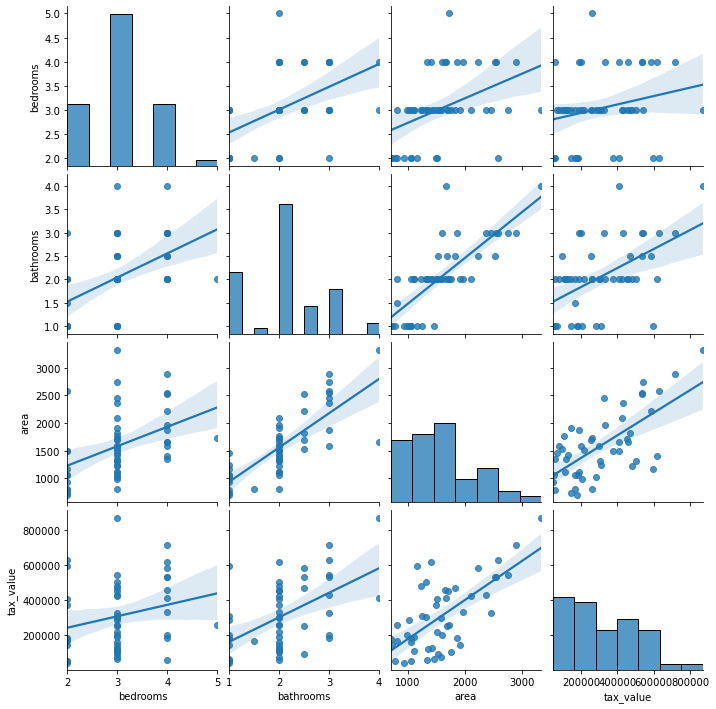

In [38]:
plot_variable_pairs(train.drop(columns=['fips', 'year_built']).sample(50))

# Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

    I am using the zillow data set so I will convert area from sq feet to square meters

1 square foot = 0.092903 meters

In [42]:
train.area.head()

10057      1561.0
2004970    1770.0
306031     1452.0
1038595    1000.0
270959     1974.0
Name: area, dtype: float64

In [43]:
train.area = train.area * .092903

In [45]:
train.area.head()

10057      145.021583
2004970    164.438310
306031     134.895156
1038595     92.903000
270959     183.390522
Name: area, dtype: float64

# Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [47]:
def plot_categorical_and_continuous_vars(df, categ, cont):
    
    

# Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

# In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.